In [ ]:
#install spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

--2021-03-27 08:10:55--  https://downloads.apache.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 2a01:4f8:10a:201a::2
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 233333392 (223M) [application/x-gzip]
Saving to: ‘spark-2.4.7-bin-hadoop2.7.tgz’

spark-2.4.7-bin-had 100%[===================>] 222.52M  23.9MB/s    in 10s     

2021-03-27 08:11:05 (22.3 MB/s) - ‘spark-2.4.7-bin-hadoop2.7.tgz’ saved [233333392/233333392]



In [ ]:
#setting environment variable
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

In [ ]:
#import spark dan buat spark session
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
#upload file
from google.colab import files
!rm contoh_clust2.csv
files.upload()

rm: cannot remove 'contoh_clust2.csv': No such file or directory


Saving contoh_clust2.csv to contoh_clust2.csv


{'contoh_clust2.csv': b'x,y,hasil\r\n-3.5429550969664367,-0.00696855436999233,1.0\r\n-2.3316986550613787,0.44003169597474656,1.0\r\n-2.959683409864125,-0.5634355271930849,1.0\r\n2.3273866354072896,2.222651504479419,0.0\r\n-5.064657651260257,-2.1032816302633566,1.0\r\n1.9370736831226498,2.9060880433086544,0.0\r\n0.9798013463846641,2.829970325582672,0.0\r\n-4.57376594874914,-1.7305178525509632,1.0\r\n-3.343835414469978,-0.5009948867115551,1.0\r\n0.19791813006221348,1.843240478987643,0.0\r\n-5.154521554200835,-0.8896451522348774,1.0\r\n-3.9898934900669616,2.07897688119107,1.0\r\n-0.16773652026057917,0.10972356321241876,1.0\r\n-4.3735483085699025,0.5888041446734951,1.0\r\n2.701924989927712,3.965085103160744,0.0\r\n0.5656489397121832,7.400180465447473,0.0\r\n-4.1782389787572605,0.8535056852430456,1.0\r\n-5.475367952146424,1.8240779986274513,1.0\r\n0.784197773642578,6.81739740730271,0.0\r\n0.1293399437626962,3.3883304006793846,0.0\r\n-0.3697299810521737,2.627142811097839,0.0\r\n-0.8502269419

In [ ]:
#load data 
datalatih = spark.read.csv('contoh_clust2.csv',inferSchema=True, header=True)
datalatih.show(3)

+-------------------+--------------------+-----+
|                  x|                   y|hasil|
+-------------------+--------------------+-----+
|-3.5429550969664367|-0.00696855436999233|  1.0|
|-2.3316986550613787| 0.44003169597474656|  1.0|
| -2.959683409864125| -0.5634355271930849|  1.0|
+-------------------+--------------------+-----+
only showing top 3 rows



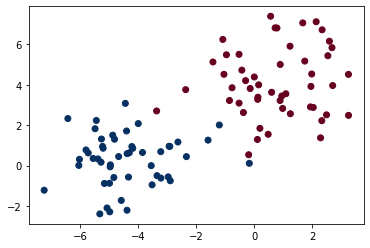

In [ ]:
#visualisasion
import matplotlib.pyplot as plt
x = datalatih.select("x").rdd.flatMap(lambda x: x).collect()
y = datalatih.select("y").rdd.flatMap(lambda x: x).collect()
hasil = datalatih.select("hasil").rdd.flatMap(lambda x: x).collect()
plt.scatter(x, y,c=hasil,cmap='RdBu');

In [ ]:
from pyspark.ml.classification import LogisticRegression
mesin = LogisticRegression(labelCol='hasil',elasticNetParam=0.7)

In [ ]:
#periksa data awal
datalatih.show(3)

+-------------------+--------------------+-----+
|                  x|                   y|hasil|
+-------------------+--------------------+-----+
|-3.5429550969664367|-0.00696855436999233|  1.0|
|-2.3316986550613787| 0.44003169597474656|  1.0|
| -2.959683409864125| -0.5634355271930849|  1.0|
+-------------------+--------------------+-----+
only showing top 3 rows



In [ ]:
#persiapkan data
from pyspark.ml.feature import VectorAssembler
vec=VectorAssembler(inputCols=['x','y'],outputCol='features')
datalatih_vec = vec.transform(datalatih)

In [ ]:
#periksa hasil
datalatih_vec.show(3)

+-------------------+--------------------+-----+--------------------+
|                  x|                   y|hasil|            features|
+-------------------+--------------------+-----+--------------------+
|-3.5429550969664367|-0.00696855436999233|  1.0|[-3.5429550969664...|
|-2.3316986550613787| 0.44003169597474656|  1.0|[-2.3316986550613...|
| -2.959683409864125| -0.5634355271930849|  1.0|[-2.9596834098641...|
+-------------------+--------------------+-----+--------------------+
only showing top 3 rows



In [ ]:
#lakukan pelatihan
model = mesin.fit(datalatih_vec)

In [ ]:
#pengujian  dengan 1000 data
import numpy as np
rng = np.random.RandomState(0)
xuji= [-8,-4] + [12,12] * rng.rand(1000, 2)
arr = xuji.tolist()

In [ ]:
xuji

array([[-1.41423795,  4.5822724 ],
       [-0.76683949,  2.5385982 ],
       [-2.91614241,  3.75072936],
       ...,
       [-3.02673352,  5.49537863],
       [ 0.65437736,  1.76129369],
       [-0.27363156,  2.02127757]])

In [ ]:
#sessuaikan inputan model
from pyspark.sql.types import DoubleType
dftest = spark.createDataFrame(arr)

In [ ]:
#test
dftest.show(5)

+-------------------+-----------------+
|                 _1|               _2|
+-------------------+-----------------+
| -1.414237952872103|4.582272396469033|
| -0.766839487140274|2.538598195962763|
| -2.916142407933144|3.750729356799873|
|-2.7489534648476894|6.701276009384957|
| 3.5639531260123505|0.601298225909332|
+-------------------+-----------------+
only showing top 5 rows



In [ ]:
#sesuaikan format untuk inputan model
testvec = VectorAssembler(inputCols=['_1','_2'],outputCol='features')
testvec = testvec.transform(dftest)

In [ ]:
#test
testvec.show(3)

+------------------+-----------------+--------------------+
|                _1|               _2|            features|
+------------------+-----------------+--------------------+
|-1.414237952872103|4.582272396469033|[-1.4142379528721...|
|-0.766839487140274|2.538598195962763|[-0.7668394871402...|
|-2.916142407933144|3.750729356799873|[-2.9161424079331...|
+------------------+-----------------+--------------------+
only showing top 3 rows



In [ ]:
#prediksi
prediksi = model.transform(testvec)

In [ ]:
prediksi.show(3)

+------------------+-----------------+--------------------+--------------------+--------------------+----------+
|                _1|               _2|            features|       rawPrediction|         probability|prediction|
+------------------+-----------------+--------------------+--------------------+--------------------+----------+
|-1.414237952872103|4.582272396469033|[-1.4142379528721...|[7.68218794612520...|[0.99953924716348...|       0.0|
|-0.766839487140274|2.538598195962763|[-0.7668394871402...|[3.64219519356234...|[0.97447387303765...|       0.0|
|-2.916142407933144|3.750729356799873|[-2.9161424079331...|[2.75819068329308...|[0.94037426551543...|       0.0|
+------------------+-----------------+--------------------+--------------------+--------------------+----------+
only showing top 3 rows



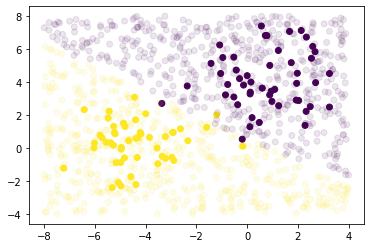

In [ ]:
#visualisasi prediksi
soalx = prediksi.select("_1").rdd.flatMap(lambda x: x).collect()
soaly = prediksi.select("_2").rdd.flatMap(lambda x: x).collect()
pred = prediksi.select("prediction").rdd.flatMap(lambda x: x).collect()
plt.scatter(x,y,c=hasil)
plt.scatter(soalx,soaly,c=pred,alpha=0.1)